In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)

In [184]:
df = pd.read_csv('loan_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Statistics about the dataset

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [144]:
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [145]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Dealing with missing values

In [146]:
df = df.drop('Credit_History', axis=1)

In [147]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Property_Area         0
Loan_Status           0
dtype: int64

In [148]:
df = df.drop('Dependents',axis=1)

In [149]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Property_Area         0
Loan_Status           0
dtype: int64

In [150]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
L_A_T  = df['Loan_Amount_Term'].values
L_A_T = L_A_T.reshape(-1,1)
transformed = imputer.fit_transform(L_A_T)
df['Loan_Amount_Term'] = transformed
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Property_Area         0
Loan_Status           0
dtype: int64

In [151]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
L_A_T  = df['LoanAmount'].values
L_A_T = L_A_T.reshape(-1,1)
transformed = imputer.fit_transform(L_A_T)
df['LoanAmount'] = transformed
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Property_Area         0
Loan_Status           0
dtype: int64

In [152]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
L_A_T  = df['Self_Employed'].values
L_A_T = L_A_T.reshape(-1,1)
transformed = imputer.fit_transform(L_A_T)
df['Self_Employed'] = transformed
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Property_Area         0
Loan_Status           0
dtype: int64

In [153]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
L_A_T  = df['Gender'].values
L_A_T = L_A_T.reshape(-1,1)
transformed = imputer.fit_transform(L_A_T)
df['Gender'] = transformed
df.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
Loan_Status          0
dtype: int64

In [154]:
df = df.dropna()

In [155]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
Loan_Status          0
dtype: int64

## Pair plot of the dataset

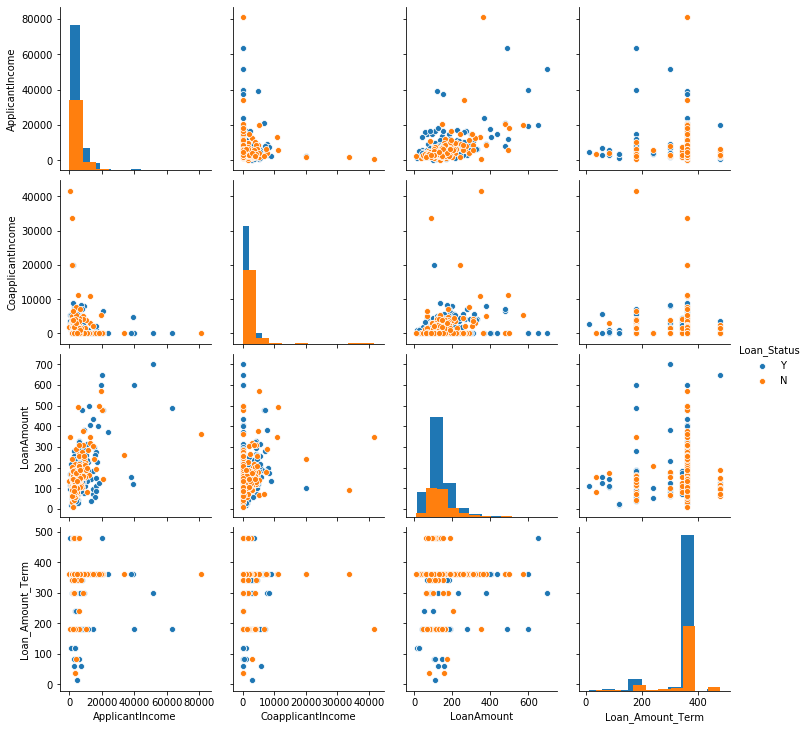

In [156]:
sns.pairplot(df, hue="Loan_Status", diag_kind="hist")

## Dealing with Categorical Variables

In [157]:
df.head(10)

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,5849,0.0,146.412162,360.0,Urban,Y
1,LP001003,Male,Yes,Graduate,No,4583,1508.0,128.000000,360.0,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,3000,0.0,66.000000,360.0,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,2583,2358.0,120.000000,360.0,Urban,Y
4,LP001008,Male,No,Graduate,No,6000,0.0,141.000000,360.0,Urban,Y
5,LP001011,Male,Yes,Graduate,Yes,5417,4196.0,267.000000,360.0,Urban,Y
6,LP001013,Male,Yes,Not Graduate,No,2333,1516.0,95.000000,360.0,Urban,Y
7,LP001014,Male,Yes,Graduate,No,3036,2504.0,158.000000,360.0,Semiurban,N
8,LP001018,Male,Yes,Graduate,No,4006,1526.0,168.000000,360.0,Urban,Y
9,LP001020,Male,Yes,Graduate,No,12841,10968.0,349.000000,360.0,Semiurban,N


In [158]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [159]:
df_gender = df['Gender'].map({'Male':0,'Female':1})

In [160]:
df['Gender'] = df_gender

In [161]:
df_married = df['Married'].map({'Yes':1,'No':0})
df['Married'] = df_married

In [162]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [163]:
df_edu = df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Education'] = df_edu 

In [164]:
df_emp = df['Self_Employed'].map({'Yes':1,'No':0})
df['Self_Employed'] = df_emp

In [165]:
df_status = df['Loan_Status'].map({'Y':1,'N':0})
df['Loan_Status'] = df_status

In [166]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [167]:
df = pd.get_dummies(df, columns=['Property_Area'])

In [185]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [169]:
df = df.drop('Loan_ID',axis=1)

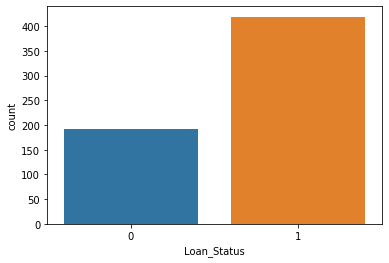

In [183]:
sns.countplot(df['Loan_Status'])

In [173]:
from sklearn.model_selection import train_test_split
y = df['Loan_Status']
X =  df.drop('Loan_Status',axis=1)

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Decision Tree & Random Forest Classifier

In [175]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)

In [176]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [177]:
prediction_dtc = dtc.predict(X_test)

In [182]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, prediction_dtc))
print(confusion_matrix(y_test, prediction_dtc))
print(dtc.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.39      0.43      0.41        54
           1       0.75      0.72      0.74       130

    accuracy                           0.64       184
   macro avg       0.57      0.57      0.57       184
weighted avg       0.65      0.64      0.64       184

[[23 31]
 [36 94]]
0.6358695652173914


In [179]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train,y_train)
predict_rf = clf.predict(X_test)

In [181]:
print(classification_report(y_test, predict_rf))
print(confusion_matrix(y_test, predict_rf))
print(clf.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.71      1.00      0.83       130

    accuracy                           0.71       184
   macro avg       0.35      0.50      0.41       184
weighted avg       0.50      0.71      0.59       184

[[  0  54]
 [  0 130]]
0.7065217391304348
